# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.



**Introduction Project**

The purpose of this project either the customer’s marital status and number of children has an impact on whether they will default on a loan based on client credit score datasets. The hypotheses are:
- Is there a connection between having kids and repaying a loan on time?
- Is there a connection between marital status and repaying a loan on time?
- Is there a connection between income level and repaying a loan on time?
- How do different loan purposes affect on-time loan repayment?


## Open the data file and have a look at the general information. 

Start with importing all the libraries and loading the data.

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Load the data
"credit_score = pd.read_csv('/datasets/credit_scoring_eng.csv')"
credit_score = pd.read_csv('C:/Users/zaman/OneDrive/Desktop/Practicum/Portfolio/Project 2 (Data Preprocessing)/credit_scoring_eng.csv')

## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

Now, let's explore the data to see how many columns and rows it has. Plus, look to the few rows to check for potential issues with the data.

In [3]:
# Let's see how many rows and columns our dataset has
credit_score.shape


(21525, 12)

In [4]:
# the first 10 rows
credit_score.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


From the observation:
- Data sample have 21525 rows and 12 columns
- Education column: Needs to be rename (Ex: 'BACHELOR'S DEGREE' to 'bachelor's degree')
- Purpose column: duplicate purpose
- Days employed: negative value
- Data also need to further investigation  

In [5]:
# Get info on data
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Different value count inside 'days_employed' and 'total_income' columns from the rest. This columns have missing values. 

In [6]:
# Let's look in the filtered table at the the first column with missing data
credit_score[credit_score['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Assumption:
- The missing value in the 1st and 2nd columns look like symmetric. 
- However, further investigations is needed to prove all the rows with missing values are of the same size to prove the above statement. 

In [7]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
missing_values = credit_score.loc[(credit_score['days_employed'].isna()) & (credit_score['total_income'].isna())]
missing_values

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Intermediate conclusion**

General conclusion:
- The missing values in 'days_employed' and 'total_income' columns have the same rows. 
- Therefore, there are 2174 rows of the missing values all in same rows.
- The statement has been proven.

Conclusion for missing values compared to the whole dataset:
- The percentage of the  missing values = (2174/21525) * 100% = 0.1%
- From the table for missing values, no specific client characteristic that cause the missing values because the missing value are random. 
- The missing values can be fill by using median or mean but must been consider the other columns that may dependence with the missing values.

Planning for the next step
- The next step is to find the reason why the columns have the missing values.

In [11]:
missing_values['income_type'].value_counts() 

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

In [10]:
missing_values['income_type'].value_counts(normalize=True) 

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

From the observation, the most number of customers that have missing values are employees, and the second place are businesses, then, retiree, civil person and lastly enterpreneur.

**Possible reasons for missing values in data**
- The employees, which the most number of customers who have missing values must have payslip. Therefore, it is impossible that their total income is unknown
- So, the missing values in the data might be the human mistake
- From the table, the missing values are random because no indicators that dependence each other.

In [12]:
# Checking the distribution in the whole dataset
customer_distribution = credit_score.groupby('income_type')['purpose'].count().reset_index()
customer_distribution = customer_distribution.rename(columns={'purpose':'customer_count'})
customer_distribution

,income_type,customer_count
0,business,5085
1,civil servant,1459
2,employee,11119
3,entrepreneur,2
4,paternity / maternity leave,1
5,retiree,3856
6,student,1
7,unemployed,2


**Intermediate conclusion**

The distribution in the original dataset is quite similar with the missing values dataset. However, the differences are no missing values for paternity, student, and unemployed. The dataset need to be investigate further to find other reasons that could lead to data missing and check the any pattern that lead the missing values are not random.

In [13]:
# Check for other reasons and patterns that could lead to missing values
m_family_count = missing_values.groupby('family_status')['purpose'].count().reset_index()
m_family_count = m_family_count.rename(columns={'purpose':'customer_count'})
m_family_count

,family_status,customer_count
0,civil partnership,442
1,divorced,112
2,married,1237
3,unmarried,288
4,widow / widower,95


In [14]:
family_count = credit_score.groupby('family_status')['purpose'].count().reset_index()
family_count = family_count.rename(columns={'purpose':'customer_count'})
family_count

,family_status,customer_count
0,civil partnership,4177
1,divorced,1195
2,married,12380
3,unmarried,2813
4,widow / widower,960


**Intermediate conclusion**

The comparison between 'family_status' from the original dataset and missing dataset show the missing values are still random and not dependence from the 2 columns. However, the pattern that been found from the 2 table above are the majority from each characteristic have the most number of missing values.

**Conclusions**

The missing values still random and not dependence with any client characteristic. However, pattern that been found are if the total number of client for each characteristics increase, the missing values for the characteristics also increase. The columns which values are missing are total income and days employed. The missing values will be fill using mean or median.

Plan for the next step:
    - Fix the duplicate on 'education' and 'purpose' columns
    - Fix the incorrect data in days_employed column (negative and etc)
    - Fill the missing value using fillna. (median or mean)

## Data transformation

Go through each column to see what issues may have in them.

Begin with removing duplicates and fixing educational information if required.

Check the data the `education` column if need to be fix.

In [15]:
# Let's see all values in education column to check if and what spellings will need to be fixed
credit_score['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

The education column have duplicates. Try to fix the duplicates by changing all uniques in lower string. Then, recheck the uniques. 

In [16]:
# Fix the registers 
credit_score['education'] = credit_score['education'].astype(str).str.lower()

In [17]:
credit_score['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [18]:
education_count = credit_score.groupby('education')['purpose'].count().reset_index()
education_count = education_count.rename(columns={'purpose':'count'})
education_count

,education,count
0,bachelor's degree,5260
1,graduate degree,6
2,primary education,282
3,secondary education,15233
4,some college,744


The `education` uniques has been fixed.

Check the data the `children` column if need to be fix. Then find the percentage for each category.

In [19]:
# Let's see the distribution of values in the `children` column
children_count = credit_score.groupby('children')['purpose'].count().reset_index()
children_count = children_count.rename(columns={'purpose':'customer_count'})

total_customer = children_count['customer_count'].sum()
children_count['percentage'] = 100 * children_count['customer_count'] / total_customer 

children_count

,children,customer_count,percentage
0,-1,47,0.218351
1,0,14149,65.732869
2,1,4818,22.383275
3,2,2055,9.547038
4,3,330,1.533101
5,4,41,0.190476
6,5,9,0.041812
7,20,76,0.353078


The strange in the data are the customer children have -1 and 20 persons. The data are illogical and unreasonable. The causes maybe because of human mistake where -1 should be 1 and 20 should be 2.Therefore, the -1 children(rows) will be change to 1 and the 20 children(rows) will be change to 2. 

In [20]:
# Fix the data by change -1 to 1 and 20 to 2
credit_score.replace(to_replace=[-1,20], value=[1,2], inplace=True)

In [21]:
# Checking the `children` column again to make sure it's all fixed and find the percentage for each category
children_count = credit_score.groupby('children')['purpose'].count().reset_index()
children_count = children_count.rename(columns={'purpose':'customer_count'})

total_customer = children_count['customer_count'].sum()
children_count['percentage'] = 100 * children_count['customer_count'] / total_customer 

children_count

,children,customer_count,percentage
0,0,14149,65.732869
1,1,4865,22.601626
2,2,2131,9.900116
3,3,330,1.533101
4,4,41,0.190476
5,5,9,0.041812


The `children` uniques has been fixed.

Check the data in the `days_employed` column and fix any kind of issues could there be and what need to check and how will do it.

Text(0, 0.5, 'days_employed')

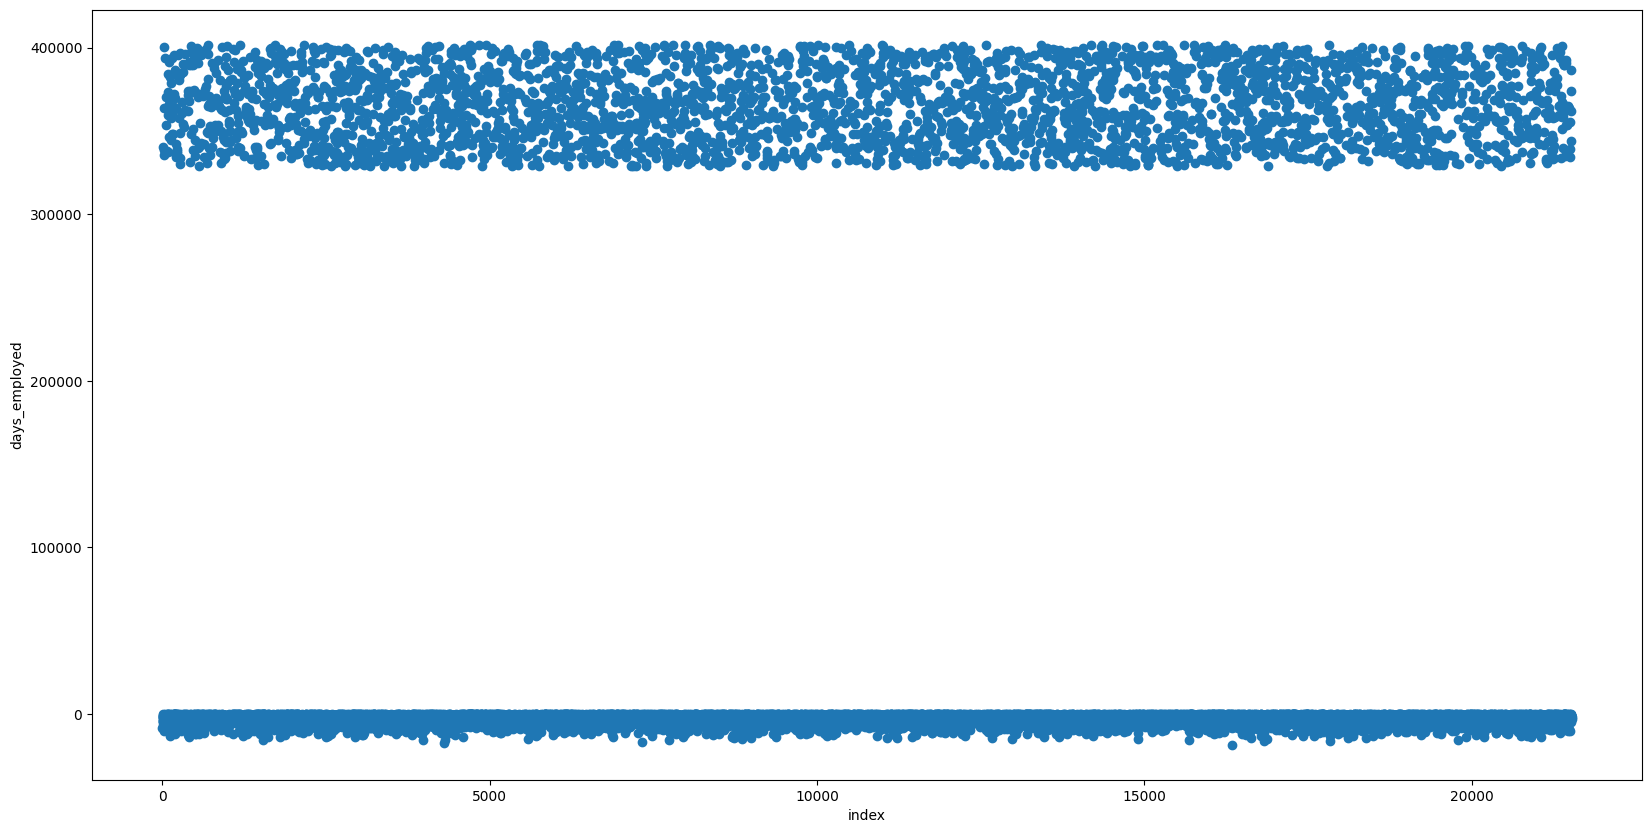

In [22]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
plt.figure(figsize=(20,10))
plt.scatter(credit_score.index,credit_score.days_employed)
plt.xlabel('index')
plt.ylabel('days_employed')

Problem:

- The problematic data are the very high(unreasonable) days data and the negative days data.
- The causes maybe because the technical errors formats (in hours) of the data when the data is initially being recorded.
- The negative value maybe also technical error and will be fix to positive.
- The column have missing values. 

In [23]:
# Change the negative days to positive and check the result
credit_score.days_employed = abs (credit_score.days_employed)
(credit_score.days_employed < 0).sum()

0

In [24]:
# Create group for unreasonable days, acceptable days, and missing value
unreasonable_days = credit_score[(credit_score.days_employed > 300000)].days_employed
acceptable_days = credit_score[(credit_score.days_employed >= 1) & (credit_score.days_employed < 300000)].days_employed
missing_value = credit_score.days_employed.isnull().sum()

total_customer = len (credit_score['days_employed'])

# Create new dataframe
data = pd.DataFrame({
        'group':  ['unreasonable_days','acceptable_days','missing_value'],
        'customer_count': [unreasonable_days.count(),acceptable_days.count(),missing_value],
        })
# Create percentage to new dataframe 
data['percentage'] = 100 * data ['customer_count'] / total_customer 
data

,group,customer_count,percentage
0,unreasonable_days,3445,16.004646
1,acceptable_days,15906,73.895470
2,missing_value,2174,10.099884


Text(0, 0.5, 'days_employed')

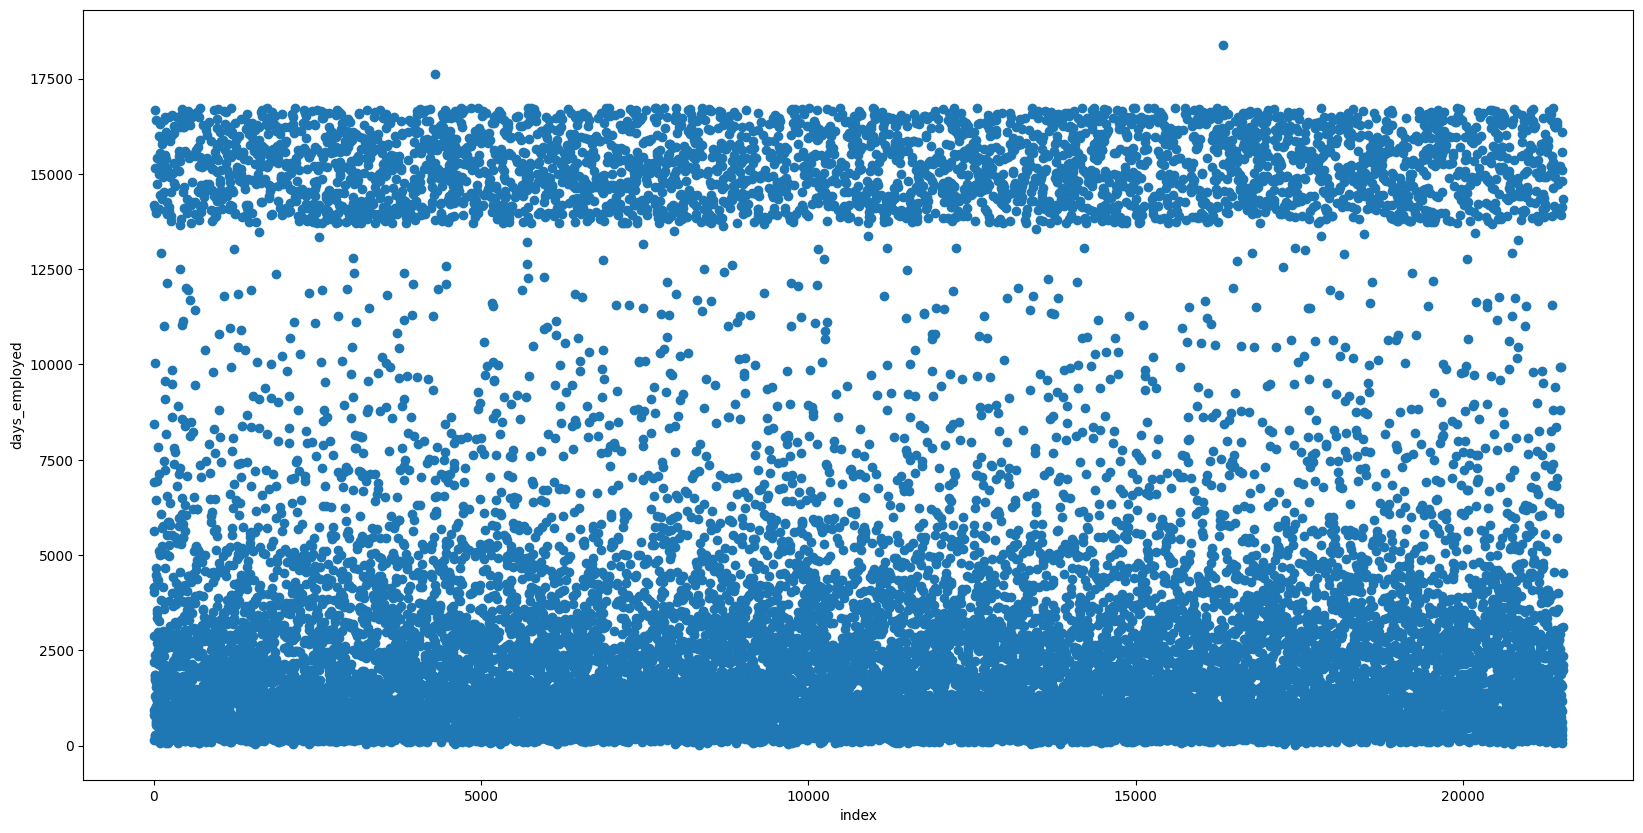

In [25]:
# Replace the unreasonable data that may in hours change to day  
change_days = unreasonable_days/24
credit_score.loc[credit_score['days_employed'] > 300000, 'days_employed'] = change_days
# Recheck the data
plt.figure(figsize=(20,10))
plt.scatter(credit_score.index,credit_score.days_employed)
plt.xlabel('index')
plt.ylabel('days_employed')

The `days_employed` columns has been fixed. The missing values will be fill later.

Check the data in the `dob_years` column and fix any kind of issues could there be and what need to check and how will do it.

In [26]:
# Check the `dob_years` for suspicious values 
credit_score['dob_years'].sort_values(ascending=True).unique()

array([ 0,  2, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [27]:
# Create group `dob_years` for suspicious values
suspicious_years = credit_score[(credit_score.dob_years == 0) | (credit_score.dob_years == 2)].dob_years
acceptable_years = credit_score[credit_score.dob_years >= 19].dob_years
missing_value = credit_score.dob_years.isnull().sum()

# Create new dataframe and count the percentage
data_years = pd.DataFrame({
        'count_group':  ['suspicious_years','acceptable_years','missing_value'],
        'customer_count': [suspicious_years.count(),acceptable_years.count(),missing_value],
        })
data_years['percentage'] = 100 * data_years ['customer_count'] / total_customer 
# Check the percentage
data_years

,count_group,customer_count,percentage
0,suspicious_years,152,0.706156
1,acceptable_years,21373,99.293844
2,missing_value,0,0.000000


Problem:

- The suspicious years are 0 and 2 and percentage is 0.706 percent.
- The suspicious years are unreasonable because no 0 year for age and 2 year are a baby.
- The cause for this suspicious years maybe technical error, where 0 and 2 should be 20. 
- Therefore, these 0 and 2 data will be combined and changed to 20. 

In [28]:
# Replace suspicious age 0 and 2 to 20
credit_score['dob_years'] = credit_score['dob_years'].replace([0,2],20)

In [29]:
# Drop the suspicious age 0 and 2 
drop_age = credit_score[credit_score['dob_years'] <= 2].index
credit_score.drop(drop_age , inplace=True)

In [30]:
# Check the result
credit_score.dob_years.sort_values(ascending=True).unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75], dtype=int64)

The `dob_years` data has been fixed.

Check the data in the `family_status` column and fix any kind of issues could there be and what need to check and how will do it.

In [31]:
# Check the unique values for the column
credit_score['family_status'].sort_values(ascending=True).unique()

array(['civil partnership', 'divorced', 'married', 'unmarried',
       'widow / widower'], dtype=object)

The `family_status` column looks good. Nothing need to be change

Check the data in the `gender` column and fix any kind of issues could there be and what need to check and how will do it.

In [32]:
# Let's see the values in the column
credit_score['gender'].sort_values(ascending=True).unique()

array(['F', 'M', 'XNA'], dtype=object)

Problem: 
- XNA is similar to NA and can consider these as missing value.


In [33]:
# Address the problematic values, if they exist
male_count   = credit_score[credit_score.gender == 'M'].gender.count()
female_count = credit_score[credit_score.gender == 'F'].gender.count()
xna_count    = credit_score[credit_score.gender == 'XNA'].gender.count()
total_customer = len (credit_score['gender'])
# Create new dataframe and count the percentage
gender_count = pd.DataFrame({
        'gender':  ['male','female','xna'],
        'customer_count': [male_count,female_count,xna_count],
        })
gender_count['percentage'] = 100 * gender_count ['customer_count'] / total_customer 
# Check the percentage
gender_count

,gender,customer_count,percentage
0,male,7288,33.858304
1,female,14236,66.137050
2,xna,1,0.004646


In [34]:
# Drop the XNA gender 
xna_row = credit_score[credit_score['gender'] == 'XNA'].index
credit_score.drop(xna_row , inplace=True)

In [35]:
#check the unique
credit_score['gender'].unique()

array(['F', 'M'], dtype=object)

Check the data in the `income_type` column and fix any kind of issues could there be and what need to check and how will do it.

In [36]:
# Let's see the values in the column
credit_score['income_type'].sort_values(ascending=True).unique()

array(['business', 'civil servant', 'employee', 'entrepreneur',
       'paternity / maternity leave', 'retiree', 'student', 'unemployed'],
      dtype=object)

In [37]:
credit_score['income_type'].isna().sum()

0

The `income_type` column looks good. Nothing need to be change

Check the duplicates in all columns.

In [38]:
# Checking `income_type` duplicates
credit_score['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [39]:
# Checking `children` duplicates
credit_score['children'].value_counts()

0    14148
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [40]:
# Checking `education` duplicates
credit_score['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             743
primary education        282
graduate degree            6
Name: education, dtype: int64

In [41]:
# Checking `family_status` duplicates
credit_score['family_status'].value_counts()

married              12380
civil partnership     4176
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [42]:
credit_score[credit_score['purpose'].duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
13,0,1846.641941,54,some college,2,married,0,F,employee,0,20873.317,car purchase
20,1,1311.604166,36,secondary education,1,married,0,M,employee,0,33528.423,property
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,14330.725172,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [43]:
# Checking `gender` duplicates
credit_score['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

In [44]:
# Checking `purpose` duplicates
credit_score['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             623
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

The `purpose` duplicates will be categorize into:
- wedding loan
- real estate loan
- properties loan
- house loan 
- car loan
- education loan

In [45]:
# Category the duplicate in `purpose`
wedding = ['wedding ceremony','having a wedding','to have a wedding']
real_estate = ['real estate transactions','buy commercial real estate','transactions with commercial real estate','transactions with my real estate','building a real estate','buy real estate','buy residential real estate']
properties = ['buying property for renting out','property','building a property']
housing = ['housing transactions','purchase of the house','housing','purchase of the house for my family','construction of own property','purchase of my own house','housing renovation']
car = ['buying my own car','car','second-hand car purchase','to own a car','buying a second-hand car','cars','to buy a car','car purchase','purchase of a car']
education = ['going to university','supplementary education','university education','education','to get a supplementary education','getting an education','profile education','getting higher education','to become educated']                           

# Replace duplicate in 'purpose' columns
credit_score.replace(wedding, 'wedding_loan', inplace=True)
credit_score.replace(real_estate, 'real_estate_loan', inplace=True)
credit_score.replace(properties, 'properties_loan', inplace=True)
credit_score.replace(housing, 'house_loan', inplace=True)
credit_score.replace(car, 'car_loan', inplace=True)
credit_score.replace(education, 'education_loan', inplace=True)

In [46]:
# Last check whether 'purpose' columns have any duplicates
credit_score['purpose'].value_counts()

real_estate_loan    4477
house_loan          4455
car_loan            4315
education_loan      4022
wedding_loan        2348
properties_loan     1907
Name: purpose, dtype: int64

In [47]:
# Check if any duplicates in data
credit_score.duplicated().value_counts()

False    21249
True       275
dtype: int64

In [48]:
# Drop the duplicates
credit_score.drop_duplicates(inplace=True)

In [49]:
# The size of the dataset that you now have after first manipulations with it
credit_score.shape

(21249, 12)

Briefly describe the new dataset:

- The different with the old dataset and the new dataset are rows a little less which is 21249 compare to original 21525 rows. - The differences are because the drop of rows in customers ages. 
- The percentage difference is 1.282%

# Working with missing values

Create dictionaries for IDs provided in the data:
- family_status_id
- education_id


In [50]:
# Find the dictionaries
user_id = dict({'family_status_id':credit_score.family_status_id, 'education_id':credit_score.education_id})
user_id.get('family_status_id')

0        0
1        0
2        0
3        0
4        1
        ..
21520    1
21521    0
21522    1
21523    0
21524    0
Name: family_status_id, Length: 21249, dtype: int64

### Restoring missing values in `total_income`

There a 2 columns that have missing values : `total_income` and `days employed`

First, start with addressing total income missing values. From the dataset,create an age category for clients. Then,create a new column with the age category. This strategy can help with calculating values for the total income. 

In [51]:
# Let's write a function that calculates the age category
def age_group(dob_years):
    if dob_years <= 30:
        return 'young adults'
    if dob_years <= 45:
        return 'middle-aged adults'
    return 'old-aged adults'
    

In [52]:
# Test if the function works
print (age_group(20))
print (age_group(35))
print (age_group(60))

young adults
middle-aged adults
old-aged adults


In [53]:
# Creating new column based on function
credit_score['age_group'] = credit_score['dob_years'].apply(age_group)


In [54]:
# Checking how values in the new column
credit_score['age_group'].value_counts()


old-aged adults       9024
middle-aged adults    8426
young adults          3799
Name: age_group, dtype: int64

To fill the missing values in `total_income`, there are many factor that probably dependence with other columns. 
From my perspective from this dataset, there are 4 columns that correlate with total income client. 
- age_group
- education
- income_type
- gender 

These columns correlate the total income based on client job experiences, education level, and client limitation (like gender and age).The mean or median values for each columns will be used for replacing the missing values.

Create a table that only has data without missing values. This data will be used to restore the missing values. 

In [55]:
# Create a table without missing values and print a few of its rows to make sure it looks fine

without_missing_income = credit_score[credit_score['total_income'].notna()]
without_missing_income.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

In [56]:
# Look at the mean values for income based your education factors
mean_education = without_missing_income.groupby('education')['total_income'].agg('mean')
mean_education

education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29040.132990
Name: total_income, dtype: float64

In [57]:
# Look at the median values for income based on education factors
median_education = without_missing_income.groupby('education')['total_income'].agg('median')
median_education

education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25608.7945
Name: total_income, dtype: float64

In [58]:
# Look at the mean values for income based on income_type factors
mean_income_type = without_missing_income.groupby('income_type')['total_income'].agg('mean')
mean_income_type

income_type
business                       32386.741818
civil servant                  27343.729582
employee                       25820.841683
entrepreneur                   79866.103000
paternity / maternity leave     8612.661000
retiree                        21940.394503
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64

In [59]:
# Look at the median values for income based on income_type factors
median_income_type = without_missing_income.groupby('income_type')['total_income'].agg('median')
median_income_type

income_type
business                       27571.0825
civil servant                  24071.6695
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18962.3180
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [60]:
# Look at the mean values for income based on age_group factors
mean_age = without_missing_income.groupby('age_group')['total_income'].agg('mean')
mean_age

age_group
middle-aged adults    28500.918312
old-aged adults       25605.151757
young adults          25802.971433
Name: total_income, dtype: float64

In [61]:
# Look at the median values for income based on age_group factors
median_age = without_missing_income.groupby('age_group')['total_income'].agg('median')
median_age

age_group
middle-aged adults    24752.294
old-aged adults       22112.445
young adults          22957.185
Name: total_income, dtype: float64

In [62]:
# Look at the mean values for income based on age_group factors
mean_gender = without_missing_income.groupby('gender')['total_income'].agg('mean')
mean_gender

gender
F    24655.604757
M    30907.144369
Name: total_income, dtype: float64

In [63]:
# Look at the median values for income based on age_group factors
median_gender = without_missing_income.groupby('gender')['total_income'].agg('median')
median_gender

gender
F    21464.845
M    26834.295
Name: total_income, dtype: float64

From the observation,the mean was chosen due to the data is numeric, has non-significant outliers, and not skewed.

In [64]:
#  Write a function that we will use for filling in missing values
credit_score['total_income'] = credit_score.groupby(['income_type','age_group','education', 'gender'])['total_income'].transform(lambda x: x.fillna(x.mean()))

In [65]:
# Check if it works
credit_score[credit_score['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,real_estate_loan,old-aged adults


Text(0, 0.5, 'total_income')

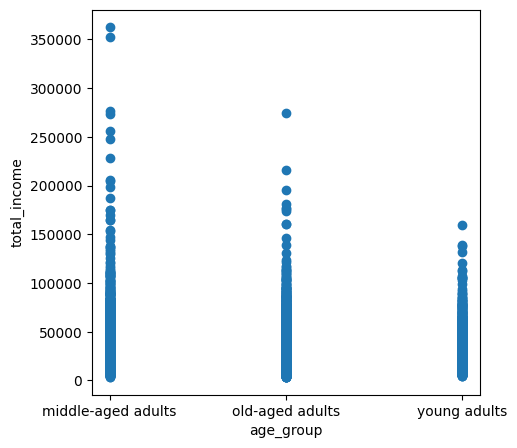

In [66]:
plt.figure(figsize=(5,5))
plt.scatter(credit_score.age_group,credit_score.total_income)
plt.xlabel('age_group')
plt.ylabel('total_income')

There are error in preparing the values for missing data. The missing value in entrepreneur income type not been filled. The reason maybe the entrepreneur income only has 1 data and cannot use mean method automatically. Therefore, the data will be fill manually.


In [67]:
# Replacing missing values if there are any errors
credit_score['total_income']=credit_score['total_income'].fillna(mean_income_type['entrepreneur'])


Lastly, check that the total number of values in this column matches the number of values in other ones.

In [68]:
# Checking the number of entries in the columns
(credit_score['total_income'] >= 1).all()


True

###  Restoring values in `days_employed`

To fill the missing values in `days_employed`, there are maybe has any factor that probably dependence with other columns. 
From my perspective from this dataset, there is 1 column that correlate with total income client. 
- income_type

This column correlate the days_employed based on client job type that differ in term of day of working. The mean or median values for each columns will be used for replacing the missing values.

In [69]:
# Look at the mean values for income based on age_group factors
mean_income_type = without_missing_income.groupby('income_type')['days_employed'].agg('mean')
mean_income_type

income_type
business                        2111.470404
civil servant                   3399.896902
employee                        2326.499216
entrepreneur                     520.848083
paternity / maternity leave     3296.759962
retiree                        15208.478802
student                          578.751554
unemployed                     15267.235531
Name: days_employed, dtype: float64

In [70]:
# Look at the median values for income based on age_group factors
median_income_type = without_missing_income.groupby('income_type')['days_employed'].agg('median')
median_income_type

income_type
business                        1546.333214
civil servant                   2689.368353
employee                        1574.202821
entrepreneur                     520.848083
paternity / maternity leave     3296.759962
retiree                        15217.221094
student                          578.751554
unemployed                     15267.235531
Name: days_employed, dtype: float64

The mean was chosen due to the data is numeric, has non-significant outliers, and not skewed.

In [71]:
# Write a function that calculates means or medians based on income_type parameter
# Apply function to the income_type
# Replacing missing values using lamda and transform method

credit_score['days_employed'] = credit_score.groupby(['income_type'])['days_employed'].transform(lambda x: x.fillna(x.mean()))

In [73]:
# Check that the function works
credit_score.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

Text(0, 0.5, 'days_employed')

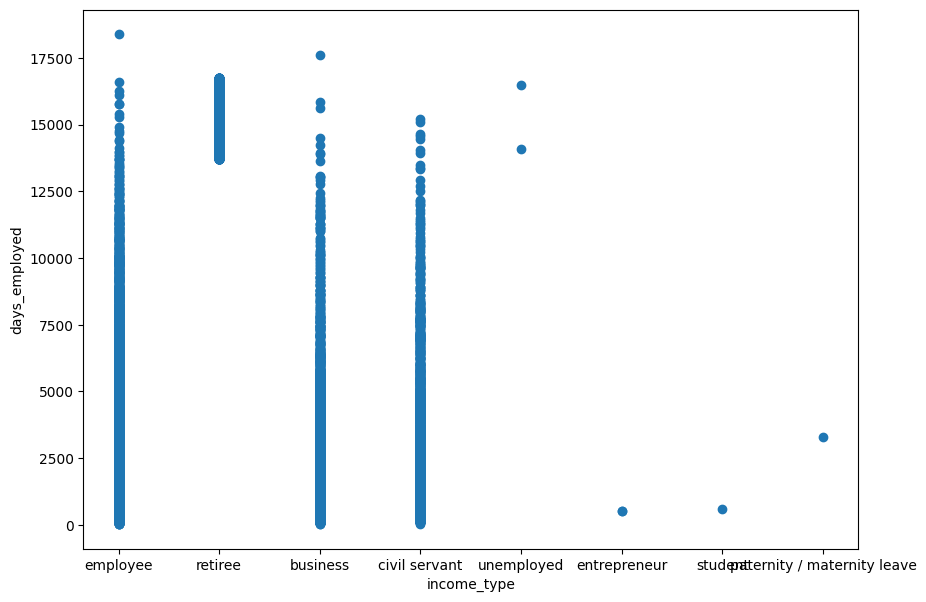

In [74]:
# Check the distribution
plt.figure(figsize=(10,7))
plt.scatter(credit_score.income_type,credit_score.days_employed)
plt.xlabel('income_type')
plt.ylabel('days_employed')

Lastly, check that the total number of values in this column matches the number of values in other ones.

In [75]:
# Check the entries in all columns - make sure we fixed all missing values

(credit_score['days_employed'] >= 1).all()

True

## Categorization of data

To answer the questions and test the hypotheses, categorized the data is needed.The first step is selected the data for categorization. Then, addresses numerical data that needs to be categorized.

First, print the values for your selected data for categorization. The selected columns are related with the hypothesis.
Hypothesis:
- Is there a connection between `having kids` and repaying a `loan on time`?
- Is there a connection between `marital status` and repaying a `loan on time`?
- Is there a connection between `income level` and repaying a `loan on time`?
- How do different `loan purposes` affect `on-time loan repayment`?

The `on-time loan repayment` will be taken from debt data where:

- 0 mean client pay on time 
- 1 mean client pay late

In [76]:
# Print the values for your selected data for categorization
selected_data = credit_score[['family_status','children','purpose','total_income','debt']]
selected_data.head(10)

,family_status,children,purpose,total_income,debt
0,married,1,house_loan,40620.102,0
1,married,1,car_loan,17932.802,0
2,married,0,house_loan,23341.752,0
3,married,3,education_loan,42820.568,0
4,civil partnership,0,wedding_loan,25378.572,0
5,civil partnership,0,house_loan,40922.170,0
6,married,0,house_loan,38484.156,0
7,married,0,education_loan,21731.829,0
8,civil partnership,2,wedding_loan,15337.093,0
9,married,0,house_loan,23108.150,0


Check unique values

In [77]:
# Check the unique values
for col in selected_data:
    print(selected_data[col].unique())

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
[1 0 3 2 4 5]
['house_loan' 'car_loan' 'education_loan' 'wedding_loan'
 'real_estate_loan' 'properties_loan']
[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]
[0 1]


Main groups based on the unique values.

- Client children and repaying a loan on time.
- Client family status and repaying a loan on time.
- Client income_level and repaying a loan on time.
- Client loan purposes and on-time loan repayment.

Based on these themes, the data that will be categorize are: 

- income level: will be categorize based on education level
- payment     : 0 in debt for pay on time and 1 in debt for pay late
     

In [78]:
# Describe on total income column
selected_data['total_income'].describe()

count     21249.000000
mean      26820.602392
std       15833.588153
min        3306.762000
25%       17124.933000
50%       23509.127000
75%       32186.898000
max      362496.645000
Name: total_income, dtype: float64

Based on describe above, income level have been estimated based on 25 percentile:
- Lower level  : total income <= 25 000
- Middle level : total income <= 50 000
- Upper level  : total income > 50000

In [79]:
# Write a function to categorize the income level
def income_level(total_income):
    if total_income <= 25000:
        return 'lower'
    if total_income <= 50000:
        return 'middle'
    return 'upper'

In [80]:
# Create a column with the categories and count the values for them
selected_data['income_level'] = selected_data['total_income'].apply(income_level)

selected_data['income_level'].value_counts()

C:\Users\zaman\AppData\Local\Temp\ipykernel_7240\1865162923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['income_level'] = selected_data['total_income'].apply(income_level)


lower     11543
middle     8385
upper      1321
Name: income_level, dtype: int64

In [81]:
# Write a function to categorize the payment
def payment(debt):
    if debt == 0:
        return 'pay_on_time'
    if debt == 1:
        return 'pay_late'

In [82]:
# Create a column with the categories and count the values for them
selected_data['payment'] = selected_data['debt'].apply(payment)
selected_data['payment'].value_counts()

C:\Users\zaman\AppData\Local\Temp\ipykernel_7240\389554966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['payment'] = selected_data['debt'].apply(payment)


pay_on_time    19509
pay_late        1740
Name: payment, dtype: int64

Categorization based on Hypotheses:

    - Connection between having kids and repaying a loan on time?
    - Connection between marital status and repaying a loan on time?
    - Connection between income level and repaying a loan on time?
    - How do different loan purposes affect on-time loan repayment?

In [83]:
# Categorized the family status with debt columns
family_status = selected_data.groupby(['family_status','payment'])[['debt']].count().reset_index()
family_status = family_status.rename(columns={'debt':'count'})
family_status

,family_status,payment,count
0,civil partnership,pay_late,388
1,civil partnership,pay_on_time,3739
2,divorced,pay_late,85
3,divorced,pay_on_time,1109
4,married,pay_late,930
5,married,pay_on_time,11253
6,unmarried,pay_late,274
7,unmarried,pay_on_time,2521
8,widow / widower,pay_late,63
9,widow / widower,pay_on_time,887


In [84]:
# Categorized the children with debt columns
children = selected_data.groupby(['children','payment'])[['debt']].count().reset_index()
children = children.rename(columns={'debt':'count'})
children

,children,payment,count
0,0,pay_late,1062
1,0,pay_on_time,12861
2,1,pay_late,445
3,1,pay_on_time,4385
4,2,pay_late,202
5,2,pay_on_time,1916
6,3,pay_late,27
7,3,pay_on_time,302
8,4,pay_late,4
9,4,pay_on_time,36


In [85]:
# Categorized the purpose with debt columns
purpose = selected_data.groupby(['purpose','payment'])[['debt']].count().reset_index()
purpose = purpose.rename(columns={'debt':'count'})
purpose

,purpose,payment,count
0,car_loan,pay_late,402
1,car_loan,pay_on_time,3870
2,education_loan,pay_late,370
3,education_loan,pay_on_time,3594
4,house_loan,pay_late,298
5,house_loan,pay_on_time,4092
6,properties_loan,pay_late,148
7,properties_loan,pay_on_time,1749
8,real_estate_loan,pay_late,336
9,real_estate_loan,pay_on_time,4084


In [86]:
# Categorized the income level with debt columns
income_level = selected_data.groupby(['income_level','payment'])[['debt']].count().reset_index()
income_level = income_level.rename(columns={'debt':'count'})
income_level

,income_level,payment,count
0,lower,pay_late,974
1,lower,pay_on_time,10569
2,middle,pay_late,674
3,middle,pay_on_time,7711
4,upper,pay_late,92
5,upper,pay_on_time,1229


## Checking the Hypotheses

Default rate will be us to answer the hypotheses. Default rate is the percentage of all outstanding loans that a lender has written off as unpaid after a prolonged period of missed payments.

Create the default rate function

In [87]:
# Create function for defaulters (debt=1)
def defaulters (a,b):
    defaulters = a / b
    return  '{:.2%}'.format(defaulters)

# Create function for non defaulters (debt=0)
def non_defaulters (a,b):
    non_defaulters = a / b
    return  '{:.2%}'.format(non_defaulters)

**Is there a correlation between having children and paying back on time?**

In [88]:
# Sum client in children group 
children_sum = children.groupby('children')['count'].sum().reset_index()
children_sum = children_sum.rename(columns={'count':'sum'})
children_sum

,children,sum
0,0,13923
1,1,4830
2,2,2118
3,3,329
4,4,40
5,5,9


In [89]:
# Check the children data and paying back on time
children_pay_on_time = children[(children['payment'] == 'pay_on_time')]

children_pay_on_time.set_index('children',inplace=True)
children_sum.set_index('children',inplace=True)

children_pay_on_time = pd.concat([children_pay_on_time,children_sum],axis=1,sort=False).reset_index()
children_pay_on_time

,children,payment,count,sum
0,0,pay_on_time,12861,13923
1,1,pay_on_time,4385,4830
2,2,pay_on_time,1916,2118
3,3,pay_on_time,302,329
4,4,pay_on_time,36,40
5,5,pay_on_time,9,9


In [90]:
# Check the children data and paying late
children_pay_late = children[(children['payment'] == 'pay_late')]

children_pay_late.set_index('children',inplace=True)

children_pay_late = pd.concat([children_pay_late,children_sum],axis=1,sort=False).reset_index()
children_pay_late.fillna({'payment':'pay_late', 'count':0}, inplace=True)
children_pay_late['count'] = children_pay_late['count'].astype(int)
children_pay_late

,children,payment,count,sum
0,0,pay_late,1062,13923
1,1,pay_late,445,4830
2,2,pay_late,202,2118
3,3,pay_late,27,329
4,4,pay_late,4,40
5,5,pay_late,0,9


In [91]:
# Apply the function
children_pay_late['default_rate'] = children_pay_late.apply(lambda x: defaulters(x['count'], x['sum']), axis=1)
children_pay_on_time['non_default_rate'] = children_pay_on_time.apply(lambda x: non_defaulters(x['count'], x['sum']), axis=1)

In [92]:
# Create new dataframe for defaulters and non-defaulters
def_children     = children_pay_late[['children','default_rate']]
non_def_children = children_pay_on_time[['children','non_default_rate']]


# Set the 'children' column as index
def_children.set_index('children',inplace=True)
non_def_children.set_index('children',inplace=True)
    
# Append both dataframe
default_rate_children = pd.concat([children_sum,non_def_children,def_children],axis=1,sort=False).reset_index()

# Fill the missing values to 0.00%
default_rate_children.fillna('{:.2%}'.format(0))

,children,sum,non_default_rate,default_rate
0,0,13923,92.37%,7.63%
1,1,4830,90.79%,9.21%
2,2,2118,90.46%,9.54%
3,3,329,91.79%,8.21%
4,4,40,90.00%,10.00%
5,5,9,100.00%,0.00%


**Conclusion**

From the observations:
 - Client who have 4 kids are the most lender missed payments or pay late.
 - Client who have 5 kids has no pay late.
 - Client who have 0 kids has the second least percentage who their lender pay late.
 
In conclusion, client who has the most kids always pay their loan on time. However, client who has 5 kids is the least number of client and it is rare. From the data, the default rate percentage are almost equally distribute. Therefore, the clients who has 0 kids should be prioritize compare to clent who has kids.

**Is there a correlation between family status and paying back on time?**

In [93]:
# Sum client in family_status group 
family_status_sum = family_status.groupby('family_status')['count'].sum().reset_index()
family_status_sum = family_status_sum.rename(columns={'count':'sum'})
family_status_sum

,family_status,sum
0,civil partnership,4127
1,divorced,1194
2,married,12183
3,unmarried,2795
4,widow / widower,950


In [94]:
# Check the family status data and paying back on time
family_status_pay_on_time = family_status[(family_status['payment'] == 'pay_on_time')]

family_status_pay_on_time.set_index('family_status',inplace=True)
family_status_sum.set_index('family_status',inplace=True)

family_status_pay_on_time = pd.concat([family_status_pay_on_time,family_status_sum],axis=1,sort=False).reset_index()
family_status_pay_on_time

,family_status,payment,count,sum
0,civil partnership,pay_on_time,3739,4127
1,divorced,pay_on_time,1109,1194
2,married,pay_on_time,11253,12183
3,unmarried,pay_on_time,2521,2795
4,widow / widower,pay_on_time,887,950


In [95]:
# Check the family_status data and paying late
family_status_pay_late = family_status[(family_status['payment'] == 'pay_late')]

family_status_pay_late.set_index('family_status',inplace=True)

family_status_pay_late = pd.concat([family_status_pay_late,family_status_sum],axis=1,sort=False).reset_index()
family_status_pay_late.fillna({'payment':'pay_late', 'count':0}, inplace=True)
family_status_pay_late

,family_status,payment,count,sum
0,civil partnership,pay_late,388,4127
1,divorced,pay_late,85,1194
2,married,pay_late,930,12183
3,unmarried,pay_late,274,2795
4,widow / widower,pay_late,63,950


In [96]:
# Apply the function
family_status_pay_late['default_rate'] = family_status_pay_late.apply(lambda x: defaulters(x['count'], x['sum']), axis=1)
family_status_pay_on_time['non_default_rate'] = family_status_pay_on_time.apply(lambda x: non_defaulters(x['count'], x['sum']), axis=1)

In [97]:
# Create new dataframe for defaulters and non-defaulters
def_family_status     = family_status_pay_late[['family_status','default_rate']]
non_def_family_status = family_status_pay_on_time[['family_status','non_default_rate']]

# Set the 'family_status' column as index
def_family_status.set_index('family_status',inplace=True)
non_def_family_status.set_index('family_status',inplace=True)
    
# Append both dataframe
default_rate_family_status = pd.concat([family_status_sum,non_def_family_status,def_family_status],axis=1,sort=False).reset_index()

# Fill the missing values to 0.00%
default_rate_family_status.fillna('{:.2%}'.format(0))

,family_status,sum,non_default_rate,default_rate
0,civil partnership,4127,90.60%,9.40%
1,divorced,1194,92.88%,7.12%
2,married,12183,92.37%,7.63%
3,unmarried,2795,90.20%,9.80%
4,widow / widower,950,93.37%,6.63%


**Conclusion**

**Is there a correlation between family status and paying back on time?**

From the observations:
 - Client who are unmarried has the most defaulters who pay late in their debt.
 - Client who are widow / widower the least defaulters who pay late in their debt.
 - The majority client and who are married has lesser default rate compared to unmarried client and civil partnership client.

In conclusion, the client who unmarried should be the last client that need to be prioritise for their loan because has the most default rate based on this table.


**Is there a correlation between income level and paying back on time?**

In [98]:
# Sum client in income_level group 
income_level_sum = income_level.groupby('income_level')['count'].sum().reset_index()
income_level_sum = income_level_sum.rename(columns={'count':'sum'})
income_level_sum

,income_level,sum
0,lower,11543
1,middle,8385
2,upper,1321


In [99]:
# Check the income_level data and paying back on time
income_level_pay_on_time = income_level[(income_level['payment'] == 'pay_on_time')]

income_level_pay_on_time.set_index('income_level',inplace=True)
income_level_sum.set_index('income_level',inplace=True)

income_level_pay_on_time = pd.concat([income_level_pay_on_time,income_level_sum],axis=1,sort=False).reset_index()
income_level_pay_on_time

,income_level,payment,count,sum
0,lower,pay_on_time,10569,11543
1,middle,pay_on_time,7711,8385
2,upper,pay_on_time,1229,1321


In [100]:
# Check the income_level data and paying late
income_level_pay_late = income_level[(income_level['payment'] == 'pay_late')]

income_level_pay_late.set_index('income_level',inplace=True)

income_level_pay_late = pd.concat([income_level_pay_late,income_level_sum],axis=1,sort=False).reset_index()
income_level_pay_late.fillna({'payment':'pay_late', 'count':0}, inplace=True)
income_level_pay_late

,income_level,payment,count,sum
0,lower,pay_late,974,11543
1,middle,pay_late,674,8385
2,upper,pay_late,92,1321


In [101]:
# Apply the function
income_level_pay_late['default_rate'] = income_level_pay_late.apply(lambda x: defaulters(x['count'], x['sum']), axis=1)
income_level_pay_on_time['non_default_rate'] = income_level_pay_on_time.apply(lambda x: non_defaulters(x['count'], x['sum']), axis=1)

In [102]:
# Create new dataframe for defaulters and non-defaulters
def_income_level     = income_level_pay_late[['income_level','default_rate']]
non_def_income_level = income_level_pay_on_time[['income_level','non_default_rate']]

# Set the 'income_level' column as index
def_income_level.set_index('income_level',inplace=True)
non_def_income_level.set_index('income_level',inplace=True)
    
# Append both dataframe
default_rate_income_level = pd.concat([income_level_sum,non_def_income_level,def_income_level],axis=1,sort=False).reset_index()
default_rate_income_level 

,income_level,sum,non_default_rate,default_rate
0,lower,11543,91.56%,8.44%
1,middle,8385,91.96%,8.04%
2,upper,1321,93.04%,6.96%


**Conclusion**

From the observations:
 - Client in lower income level has the highest default rate.
 - Client in upper income level has the least default rate.

In conclusion, the client who in upper income level category should be prioritise their loan compared to client in lower income level category.

**How does credit purpose affect the default rate?**

In [103]:
# Sum client in purpose group 
purpose_sum = purpose.groupby('purpose')['count'].sum().reset_index()
purpose_sum = purpose_sum.rename(columns={'count':'sum'})
purpose_sum

,purpose,sum
0,car_loan,4272
1,education_loan,3964
2,house_loan,4390
3,properties_loan,1897
4,real_estate_loan,4420
5,wedding_loan,2306


In [104]:
# Check the purpose data and paying back on time
purpose_pay_on_time = purpose[(purpose['payment'] == 'pay_on_time')]

purpose_pay_on_time.set_index('purpose',inplace=True)
purpose_sum.set_index('purpose',inplace=True)

purpose_pay_on_time = pd.concat([purpose_pay_on_time,purpose_sum],axis=1,sort=False).reset_index()
purpose_pay_on_time

,purpose,payment,count,sum
0,car_loan,pay_on_time,3870,4272
1,education_loan,pay_on_time,3594,3964
2,house_loan,pay_on_time,4092,4390
3,properties_loan,pay_on_time,1749,1897
4,real_estate_loan,pay_on_time,4084,4420
5,wedding_loan,pay_on_time,2120,2306


In [105]:
# Check the income_level data and paying late
purpose_pay_late = purpose[(purpose['payment'] == 'pay_late')]

purpose_pay_late.set_index('purpose',inplace=True)

purpose_pay_late = pd.concat([purpose_pay_late,purpose_sum],axis=1,sort=False).reset_index()
purpose_pay_late

,purpose,payment,count,sum
0,car_loan,pay_late,402,4272
1,education_loan,pay_late,370,3964
2,house_loan,pay_late,298,4390
3,properties_loan,pay_late,148,1897
4,real_estate_loan,pay_late,336,4420
5,wedding_loan,pay_late,186,2306


In [106]:
# Apply the function
purpose_pay_late['default_rate'] = purpose_pay_late.apply(lambda x: defaulters(x['count'], x['sum']), axis=1)
purpose_pay_on_time['non_default_rate'] = purpose_pay_on_time.apply(lambda x: non_defaulters(x['count'], x['sum']), axis=1)

In [107]:
# Create new dataframe for defaulters and non-defaulters
def_purpose    = purpose_pay_late[['purpose','default_rate']]
non_def_purpose = purpose_pay_on_time[['purpose','non_default_rate']]

# Set the 'purpose' column as index
def_purpose.set_index('purpose',inplace=True)
non_def_purpose.set_index('purpose',inplace=True)
    
# Append both dataframe
default_rate_purpose = pd.concat([purpose_sum,non_def_purpose,def_purpose],axis=1,sort=False).reset_index()
default_rate_purpose 

,purpose,sum,non_default_rate,default_rate
0,car_loan,4272,90.59%,9.41%
1,education_loan,3964,90.67%,9.33%
2,house_loan,4390,93.21%,6.79%
3,properties_loan,1897,92.20%,7.80%
4,real_estate_loan,4420,92.40%,7.60%
5,wedding_loan,2306,91.93%,8.07%


**Conclusion**

From the observations:
 - Car loan has the highest default rate in this data.
 - The least default rate is loan for wedding.

In conclusion, the client who make house loan should be prioritise compared to other purposes. 

# General Conclusion 

This project is to prepare a report for a bank’s loan division to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan based on data on customers’ credit worthiness. At the beginning, the data have missing values that are random not dependence with any client characteristic. After analysing, the pattern show that the majority for each client characteristic have the most missing values. There also have duplicate uniques in education columns that need to be fix by lower the string for all uniques. There also duplicate purpose that need to be rearrange into the same purpose (like loan for home or education purpose). Then, any duplicate in the data will be drop.

The hypothesis that can found are:
 
- Is there a connection between having kids and repaying a loan on time?
- Is there a connection between marital status and repaying a loan on time?
- Is there a connection between income level and repaying a loan on time?
- How do different loan purposes affect on-time loan repayment?

From these hypotesis, the client characteristic need to be categorize into the same level. Then, the data will be group and analyze. There for the conclusion for each hypothesis be stated below.


List of conclusions regarding the questions:

**Is there a correlation between having children and paying back on time?**

    In conclusion, client who has the most kids always pay their loan on time. However, client who has 5 kids is the least number of client and it is rare. From the data, the default rate percentage are almost equally distribute. Therefore, the clients who has 0 kids should be prioritize compare to clent who has kids.

**Is there a correlation between family status and paying back on time?**

    In conclusion, the client who unmarried should be the last client that need to be prioritise for their loan because has the most default rate based on this table.

**Is there a correlation between income level and paying back on time?**

    In conclusion, the client who in upper income level category should be prioritise their loan compared to client in lower income level category.

**How does credit purpose affect the default rate?**

    In conclusion, the client who make house loan should be prioritise compared to other purposes. 
